### Import Pckages and Load dataset

In [1]:
# Import packages
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read JSON file
with open('ultimate_data_challenge.json', 'r') as f:
    data = json.load(f)

In [3]:
# Convert JSON to DataFrame
df = pd.DataFrame(data)

### Data Wrangling

In [4]:
df.shape

(50000, 12)

In [5]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
# Convert 'signup_date' and 'last_trip_date' to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Calculate the date 30 days prior to the maximum 'last_trip_date'
reference_date = df['last_trip_date'].max() - pd.Timedelta(days=30)

# Create the 'active' column
df['active'] = df['last_trip_date'] >= reference_date

# Convert True/False to 1/0
df['active'] = df['active'].map({True: 1, False: 0})
{'Yes': 1, 'No': 0}

# Print the first few rows to verify
print(df.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  active  
0         46.2      3.67           

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

In [9]:
#Explicitly Check for missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values(by='count', ascending=False)
missing

,count,%
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000


In [10]:
# Replace missing avg_rating_of_driver values with the mean
mean_rating = df['avg_rating_of_driver'].mean()
df['avg_rating_of_driver'].fillna(mean_rating, inplace=True)


In [11]:
# Check for duplicated rows in the DataFrame
duplicates = df.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()

print(f'Number of duplicated rows: {num_duplicates}')

Number of duplicated rows: 8


In [12]:
# Remove duplicated rows from the DataFrame
#df_unique = df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(49992, 13)

In [14]:
# Check for NaN values in the DataFrame
nan_values = df.isna()

# Count the number of NaN values in each column
nan_counts = nan_values.sum()

# Check if there are any NaN values in the DataFrame
any_nan = nan_values.any().any()

print("NaN counts per column:")
print(nan_counts)
print("\nAre there any NaN values in the DataFrame?", any_nan)

NaN counts per column:
city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
active                      0
dtype: int64

Are there any NaN values in the DataFrame? True


In [15]:
# Replace missing values in 'avg_rating_by_driver' with 0 - as is where the driver is expected to have provided.
df['avg_rating_by_driver'].fillna(0, inplace=True)


In [16]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [17]:
# Save the cleaned file as a CSV
df.to_csv('ultimate_data_challenge.csv', date_format='%Y-%m-%d %H:%M:%S')

In [18]:
# Count the number of retained (active) users
num_retained = (df['active']).sum()
print("Num retained  ",num_retained)
# Calculate the total number of observed users
total_users = len(df)
print("total_users  ",total_users)

# Determine the fraction of retained users
fraction_retained = num_retained / total_users

print(f'Fraction of retained users: {fraction_retained:.2f}')

Num retained   18804
total_users   49992
Fraction of retained users: 0.38


### Exploratory Data Analysis

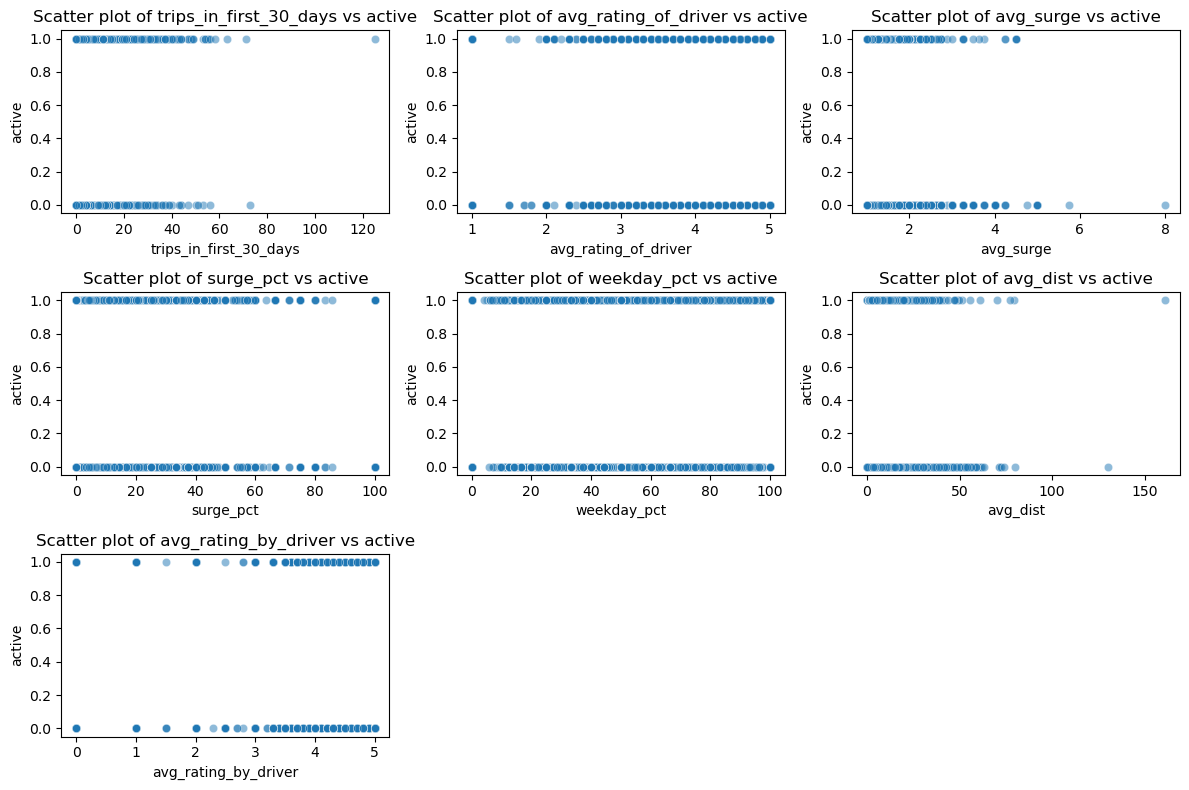

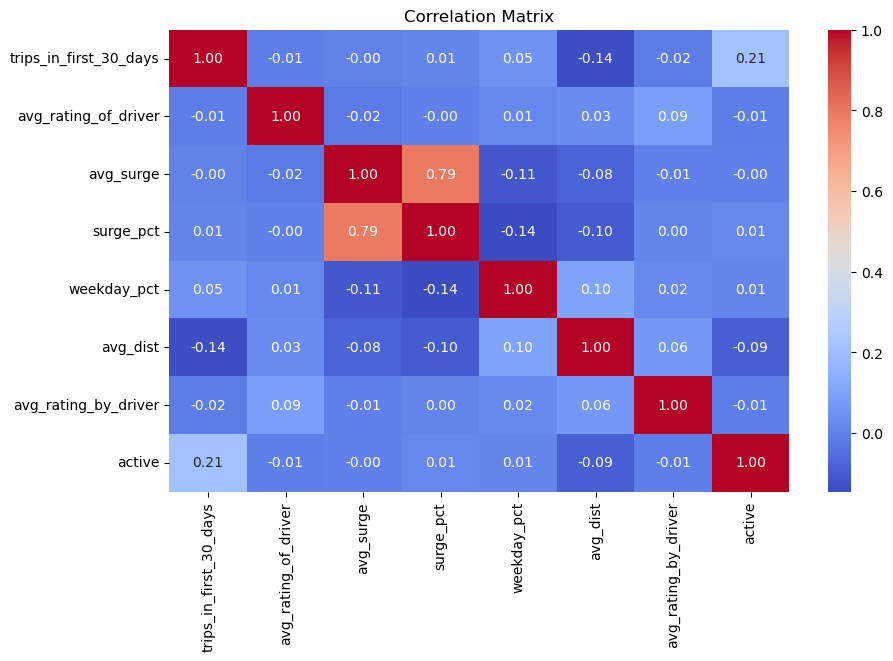

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'], start=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=feature, y='active', alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs active')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'active']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

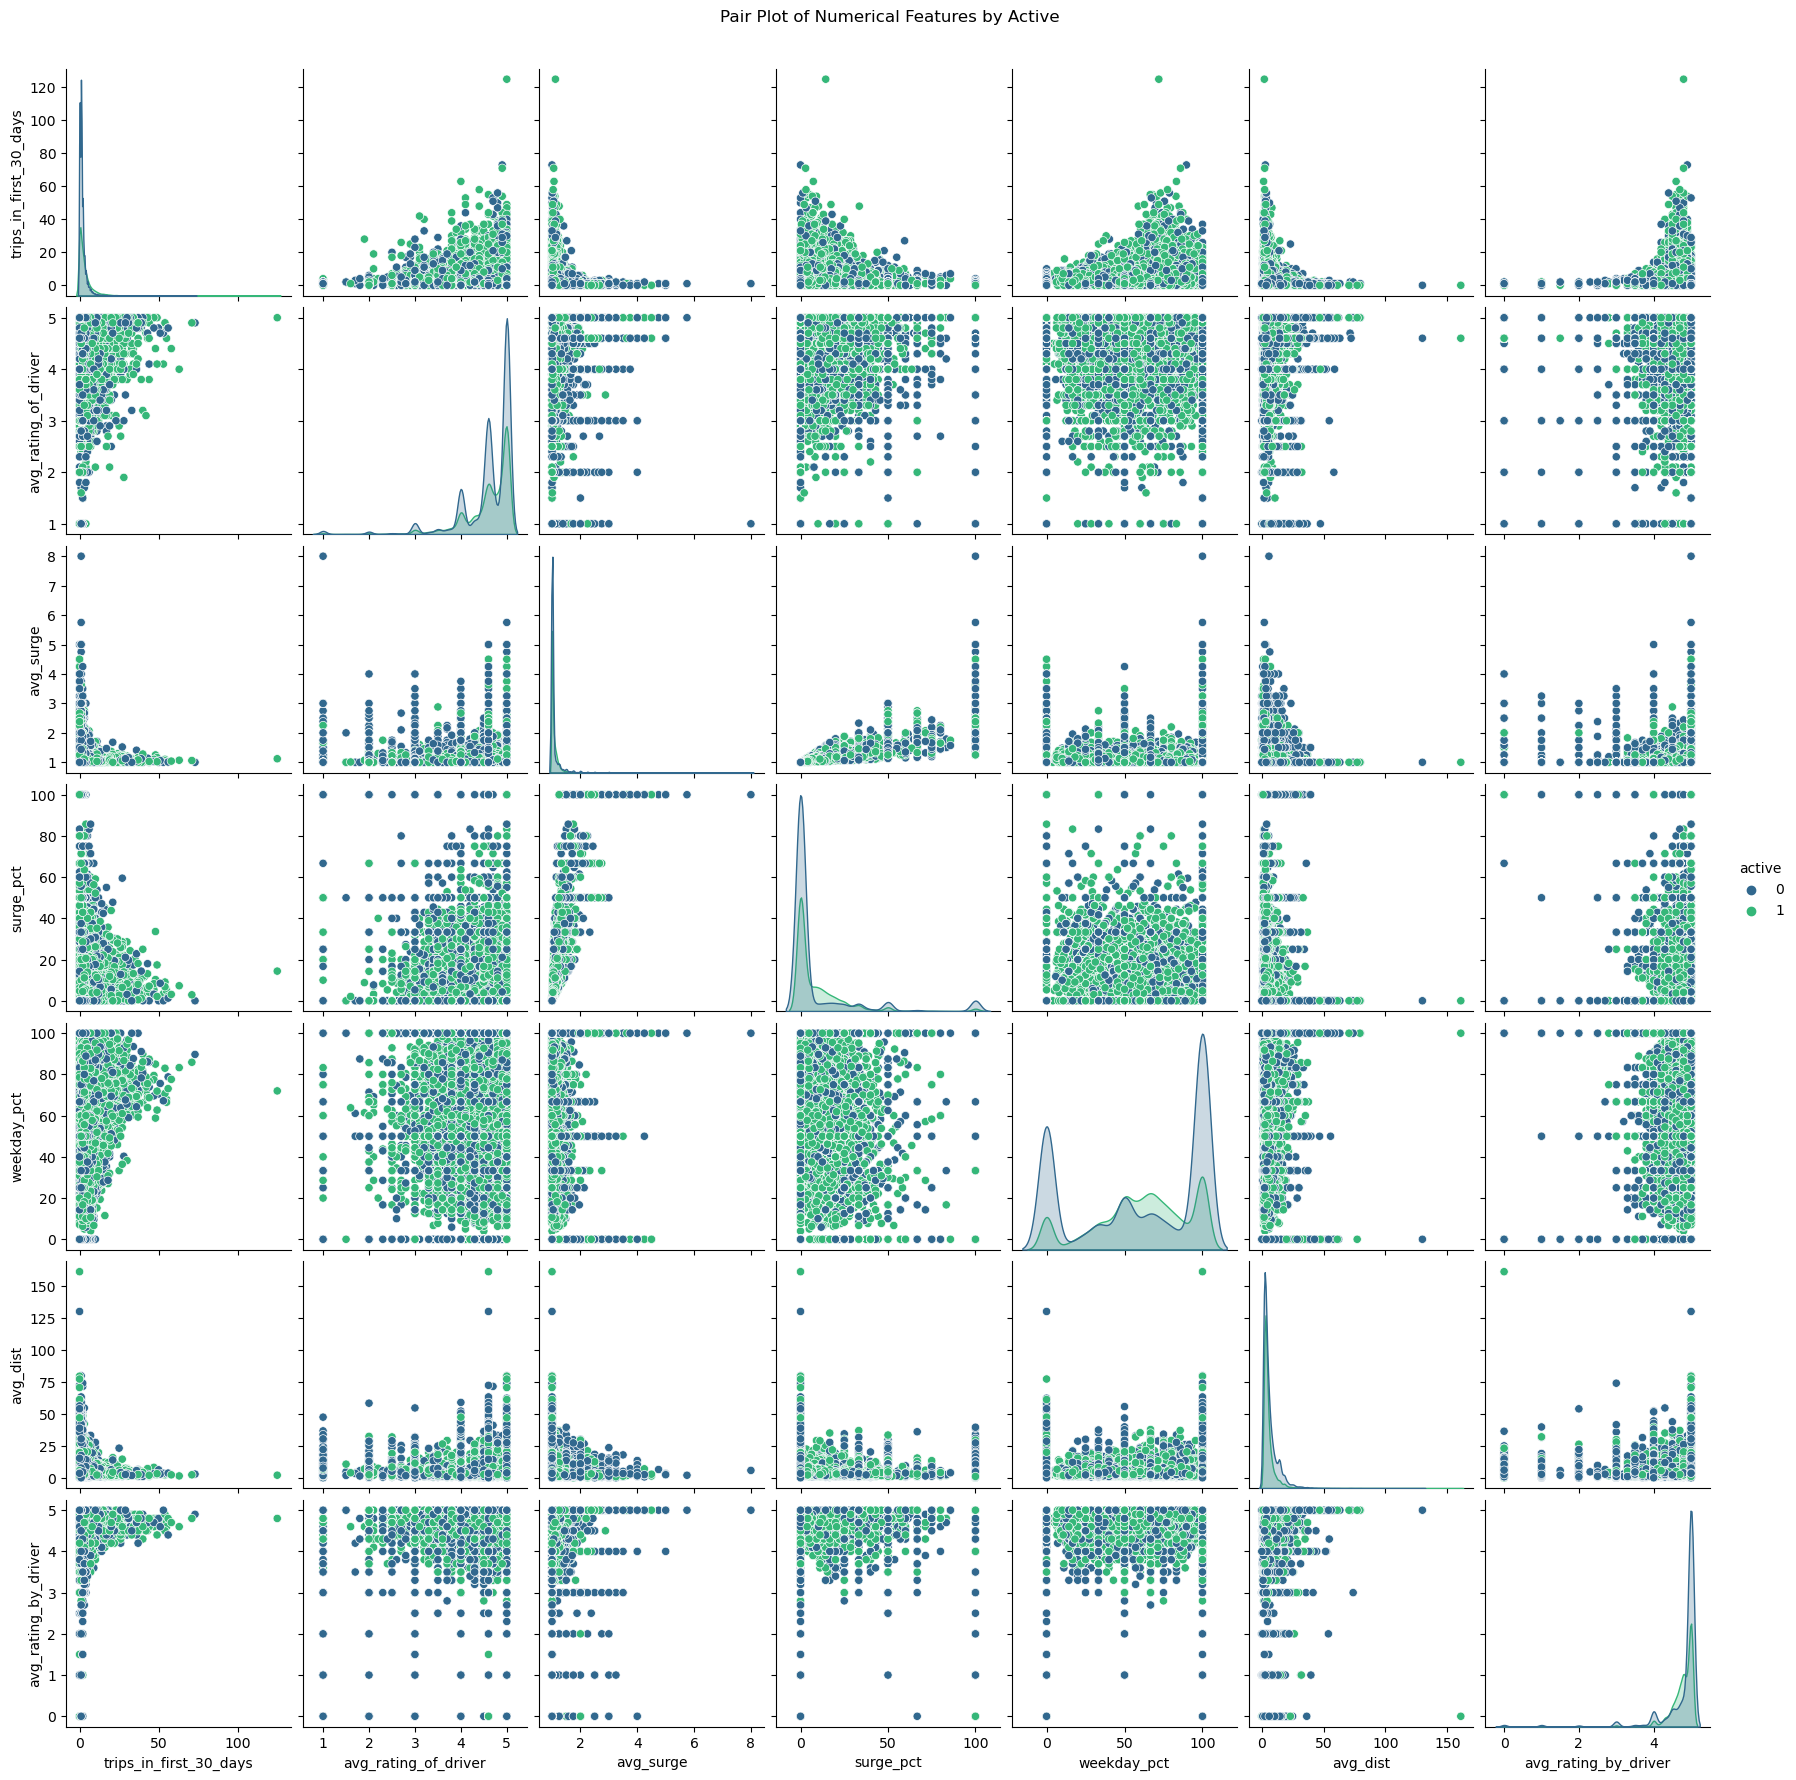

In [20]:
# Select the features and the target variable
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'active']

# Create a pair plot
sns.pairplot(df[features], hue='active', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Active', y=1.02)
plt.show()

In [21]:
from scipy.stats import pearsonr


# List of numerical features
numerical_features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

# Loop through each numerical feature
for feature in numerical_features:
    # Calculate Pearson correlation coefficient and p-value
    corr, p_value = pearsonr(df[feature], df['active'])
    
    # Print Pearson correlation and p-value
    print(f"Pearson Correlation between {feature} and active: {corr}")
    print(f"P-value: {p_value}")

    # Check for significance
    alpha = 0.05
    if p_value < alpha:
        print(f"There is a significant association between {feature} and active.")
    else:
        print(f"There is no significant association between {feature} and active.")
    print(" ")

Pearson Correlation between trips_in_first_30_days and active: 0.21043341496258516
P-value: 0.0
There is a significant association between trips_in_first_30_days and active.
 
Pearson Correlation between avg_rating_of_driver and active: -0.010774757526023764
P-value: 0.015990777924676212
There is a significant association between avg_rating_of_driver and active.
 
Pearson Correlation between avg_surge and active: -0.003375069033140443
P-value: 0.45048225277873544
There is no significant association between avg_surge and active.
 
Pearson Correlation between surge_pct and active: 0.011742411327623369
P-value: 0.008652237028814045
There is a significant association between surge_pct and active.
 
Pearson Correlation between weekday_pct and active: 0.009616565596425534
P-value: 0.03154308646358021
There is a significant association between weekday_pct and active.
 
Pearson Correlation between avg_dist and active: -0.0928466021251831
P-value: 3.99011367705394e-96
There is a significant ass

### Build the Predictive Model - Baseline

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your preprocessed DataFrame with relevant features and target variable

# Split the data into features (X) and target variable (y)
X = df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
        'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]
y = df['active']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.6564656465646564
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      6201
           1       0.69      0.18      0.28      3798

    accuracy                           0.66      9999
   macro avg       0.67      0.56      0.53      9999
weighted avg       0.67      0.66      0.59      9999

